In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

data_csv = r"csv_leaks\steady.csv"

steady = data = pd.read_csv(data_csv)



In [3]:
steady.head()

,Seconds,Timestamp_IST,S1-PT-1001A,10-PI-1110,S1-TT-1001A,10-TI-1103,S2-PT-1002A,S2-TT-1002A,20-PT-1312,S2-PT-1002B,...,MOV_3018,11-PT-1203.1,TT-1201B.1,MOV_1206,MOV_3019,S1-PT-1001B.1,S1-TT-1001B.1,S2-PT-1002B.1,S2-TT-1002B.1,20-MOV-1304
0,0,2025-08-12 16:30:53,81.525495,94.059582,25.463019,24.994202,16.110440,27.351981,4.998917,16.115449,...,1,48.428328,26.512516,1,1,81.539955,25.454164,16.096642,27.327545,1
1,5,2025-08-12 16:30:58,81.531672,94.065790,25.453725,25.005818,16.106241,27.330663,5.003575,16.107627,...,1,48.456085,26.505804,1,1,81.561758,25.453913,16.109097,27.330479,1
2,10,2025-08-12 16:31:03,81.531354,94.049099,25.470918,24.978400,16.103061,27.338960,5.003476,16.109046,...,1,48.444818,26.512507,1,1,81.493205,25.451576,16.105018,27.329003,1
3,15,2025-08-12 16:31:08,81.532418,93.975287,25.455651,25.025070,16.098854,27.331415,5.002732,16.104863,...,1,48.435954,26.530434,1,1,81.499051,25.468825,16.103739,27.344747,1
4,20,2025-08-12 16:31:13,81.405468,93.980069,25.451016,25.002667,16.122890,27.347044,4.998582,16.113627,...,1,48.441891,26.496292,1,1,81.527369,25.476476,16.107187,27.348023,1


In [4]:
leak_45_2 = pd.read_csv(r"csv_leaks\Leak at 45 km\2% Leak\202508061200GMT5x30.csv")

In [5]:
leak_45_2.head()

,Seconds,Timestamp_IST,S1-PT-1001A,10-PI-1110,S1-TT-1001A,10-TI-1103,S2-PT-1002A,S2-TT-1002A,20-PT-1312,S2-PT-1002B,...,MOV_3018,11-PT-1203.1,TT-1201B.1,MOV_1206,MOV_3019,S1-PT-1001B.1,S1-TT-1001B.1,S2-PT-1002B.1,S2-TT-1002B.1,20-MOV-1304
0,0,2025-08-06 12:00:00,81.505802,94.003750,25.468191,24.980068,16.105907,27.331827,4.999762,16.101426,...,1,48.462431,26.509752,1,1,81.494967,25.447672,16.112354,27.344726,1
1,5,2025-08-06 12:00:05,81.542218,94.125647,25.473248,25.005382,16.112124,27.340110,5.000480,16.112557,...,1,48.418329,26.514177,1,1,81.544330,25.454113,16.109296,27.326696,1
2,10,2025-08-06 12:00:10,81.456420,93.984092,25.468731,25.010398,16.120175,27.326326,5.002000,16.107052,...,1,48.462459,26.495490,1,1,81.527064,25.449259,16.108330,27.363491,1
3,15,2025-08-06 12:00:15,81.519203,94.016449,25.443925,25.023827,16.100479,27.338937,5.004135,16.101681,...,1,48.464265,26.479279,1,1,81.539033,25.445690,16.112653,27.344051,1
4,20,2025-08-06 12:00:20,81.564585,94.054088,25.450339,24.998950,16.094370,27.349509,4.999571,16.102429,...,1,48.462523,26.507726,1,1,81.498738,25.452615,16.105060,27.339186,1


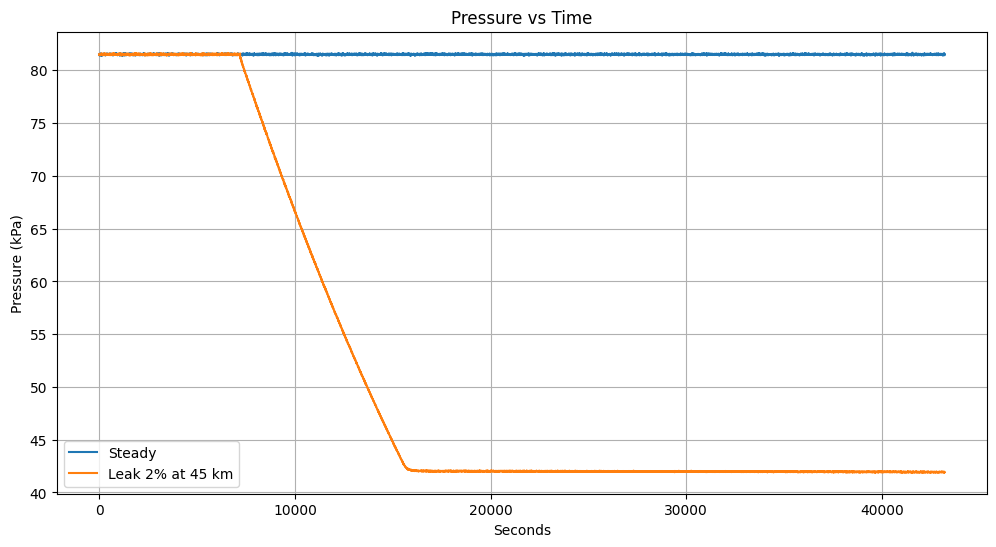

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(steady['Seconds'], steady['S1-PT-1001A'], label='Steady')
plt.plot(leak_45_2['Seconds'], leak_45_2['S1-PT-1001A'], label='Leak 2% at 45 km')
plt.xlabel('Seconds')
plt.ylabel('Pressure (kPa)')
plt.title('Pressure vs Time')
plt.legend()
plt.grid(True)
plt.show()

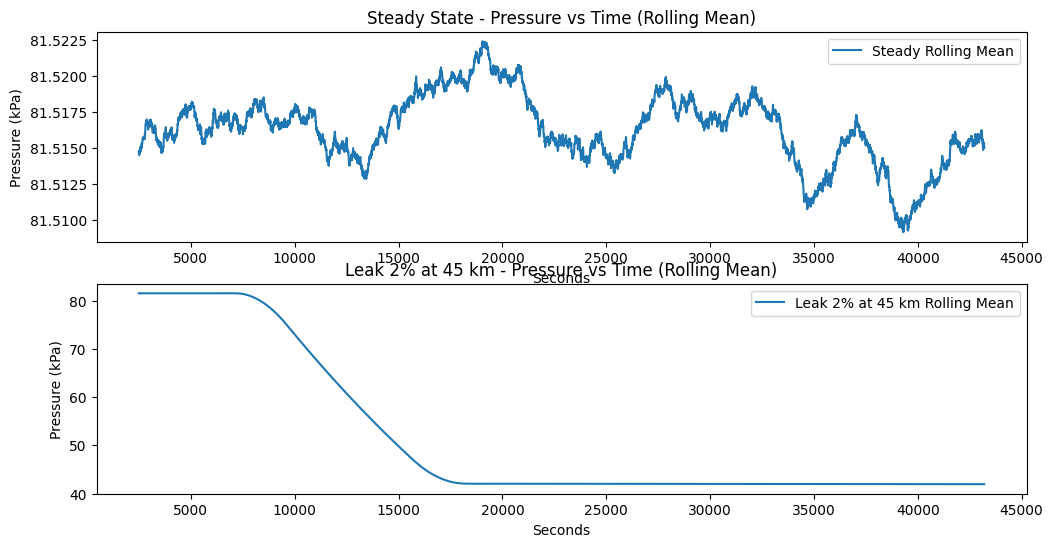

In [7]:
# plot the rollign mean for both
# rolling window size
window_size = 500
steady['Rolling_Mean'] = steady['S1-PT-1001A'].rolling(window=window_size).mean()
leak_45_2['Rolling_Mean'] = leak_45_2['S1-PT-1001A'].rolling(window=window_size).mean()
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(steady['Seconds'], steady['Rolling_Mean'], label='Steady Rolling Mean')
ax[1].plot(leak_45_2['Seconds'], leak_45_2['Rolling_Mean'], label='Leak 2% at 45 km Rolling Mean')
ax[0].set_xlabel('Seconds')
ax[0].set_ylabel('Pressure (kPa)')
ax[0].set_title('Steady State - Pressure vs Time (Rolling Mean)')
ax[1].set_xlabel('Seconds')
ax[1].set_ylabel('Pressure (kPa)')
ax[1].set_title('Leak 2% at 45 km - Pressure vs Time (Rolling Mean)')
ax[0].legend()
ax[1].legend()

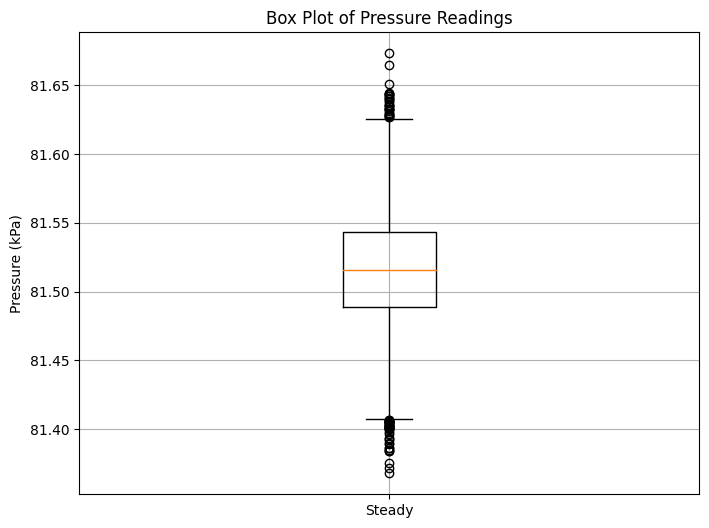

In [8]:
# box plot of both
fig, ax = plt.subplots(figsize=(8, 6))
data_to_plot = [steady['S1-PT-1001A'].dropna()]
ax.boxplot(data_to_plot, labels=['Steady'])
ax.set_ylabel('Pressure (kPa)') 
ax.set_title('Box Plot of Pressure Readings')
plt.grid(True)
plt.show()


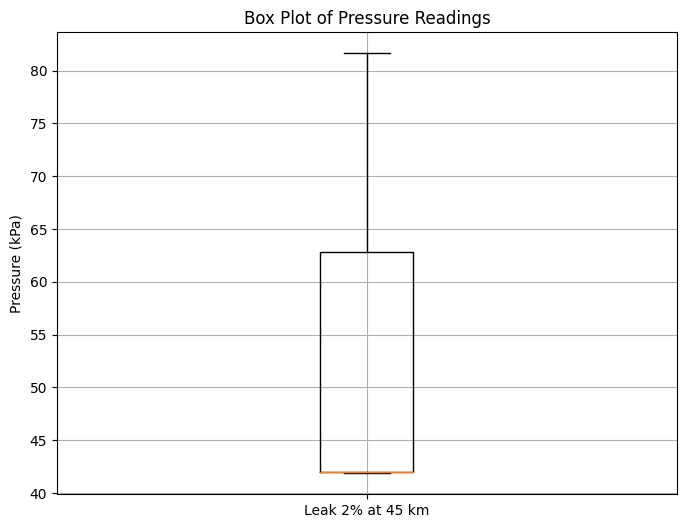

In [9]:
# box plot of both
fig, ax = plt.subplots(figsize=(8, 6))
data_to_plot = [leak_45_2['S1-PT-1001A'].dropna()]
ax.boxplot(data_to_plot, labels=[ 'Leak 2% at 45 km'])
ax.set_ylabel('Pressure (kPa)') 
ax.set_title('Box Plot of Pressure Readings')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Pressure vs Time with Outliers Highlighted')

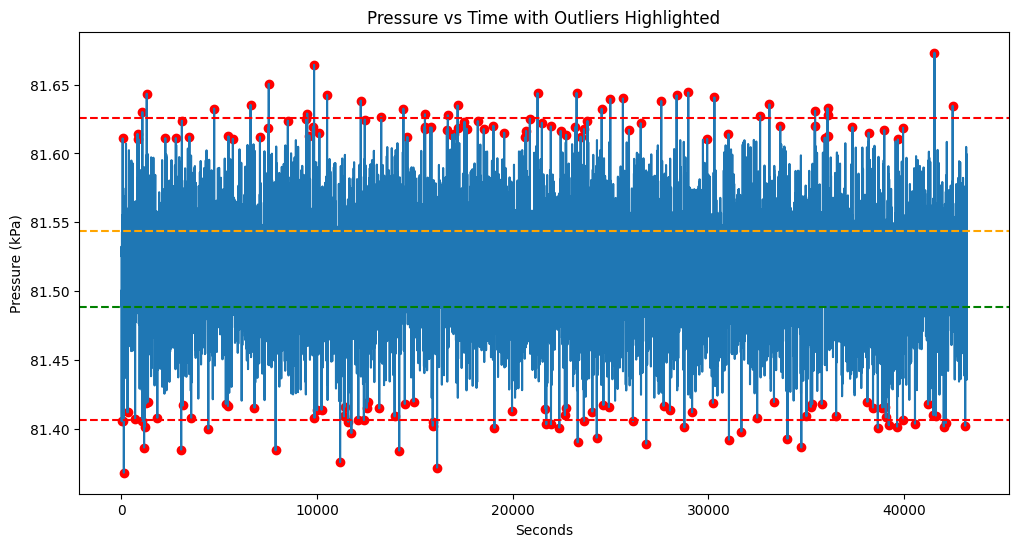

In [10]:
# LIST OF OUTLIESR IN STEADY ADN PLOT IN ROANGE..
outliers_steady = steady[(steady['S1-PT-1001A'] < steady['S1-PT-1001A'].quantile(0.01)) | (steady['S1-PT-1001A'] > steady['S1-PT-1001A'].quantile(0.99))]
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(steady['Seconds'], steady['S1-PT-1001A'], label='Steady')
plt.scatter(outliers_steady['Seconds'], outliers_steady['S1-PT-1001A'], color='red', label='Outliers')
# plot the interquartile lines
IQR = steady['S1-PT-1001A'].quantile(0.75) - steady['S1-PT-1001A'].quantile(0.25)
lower_bound = steady['S1-PT-1001A'].quantile(0.25) - 1.5 * IQR
upper_bound = steady['S1-PT-1001A'].quantile(0.75) + 1.5 * IQR
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.axhline(y=steady['S1-PT-1001A'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axhline(y=steady['S1-PT-1001A'].quantile(0.75), color='orange', linestyle='--', label='75th Percentile')
plt.xlabel('Seconds')   
plt.ylabel('Pressure (kPa)')
plt.title('Pressure vs Time with Outliers Highlighted')